In [13]:
import pandas as pd, numpy as np

# Limpeza de dados e análise usando `pandas`.

O que é importante para uma análise?

- Encontrar inconsistências e problemas.

- Sumarizar o 'comportamento' de alguns atributos. 

- Compreender a estrutura dos dados.

- Saber reconhecer variáveis importantes e extrair informações visuais. 

- Checar pressupostos utilizando teste de hipótese (requer conhecimento em estatística)

In [15]:
# preencher coluna Age
# se + 15% de nulos
# * Forma 1:
# df[df["Age"] == np.nan] = df["Age"].mean()

# * Forma 2:
# df["Age"].replace(np.nan, df["Age"].mean(), inplace = True)

#Forma 3 -  fillna troca o NA da coluna Cabin por Nao sei
#df["Age"].fillna({"Cabin" : "Nao sei", "Embarked" : "Nao sei tbm"})

Já temos as ferramentas necessárias para realizar a maioria das análises. Resta saber como faremos essas análises visuais. 

Na **prática**, usaremos módulos em Python que são responsáveis pela construção de gráficos e análise gráfica, como `matplotlib`, `seaborn` ou `plotly`. Esses tópicos serão abordados em um outro módulo. Neste caso, iremos mostrar os plots usando `pandas`.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [16]:
df = pd.read_csv('https://raw.githubusercontent.com/mdrs-thiago/uerj-topicos-a/main/datasets/occupancy_detection/class_occupancy_detection.csv')

In [3]:
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
4,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [7]:
df.isna().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

<AxesSubplot:xlabel='Temperature', ylabel='CO2'>

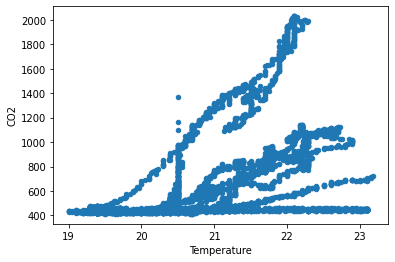

In [17]:
df.plot(kind='scatter',x='Temperature',y='CO2')

<AxesSubplot:xlabel='Light', ylabel='CO2'>

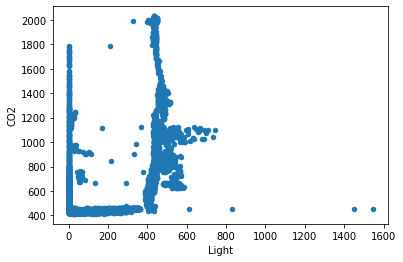

In [18]:
df.plot(kind='scatter',x='Light',y='CO2')

In [19]:
df

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.250000,0.004793,1
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.000000,0.004783,1
2,2015-02-04 17:53:00,23.15,27.2450,426.0,713.500000,0.004779,1
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.250000,0.004772,1
4,2015-02-04 17:55:00,23.10,27.2000,426.0,704.500000,0.004757,1
...,...,...,...,...,...,...,...
8138,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
8139,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
8140,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
8141,2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1


In [20]:
def remove_hour(row):
    row['date'] = row['date'].split()[0]
    return row

new_df = df.apply(remove_hour,axis='columns')

In [21]:
new_df.groupby(['date','Occupancy']).size()

date        Occupancy
2015-02-04  0             353
            1              16
2015-02-05  0             901
            1             539
2015-02-06  0             854
            1             586
2015-02-07  0            1440
2015-02-08  0            1440
2015-02-09  0             906
            1             534
2015-02-10  0             520
            1              54
dtype: int64

In [22]:
new_df.groupby(['date','Occupancy']).size().unstack()

Occupancy,0,1
date,,
2015-02-04,353.0,16.0
2015-02-05,901.0,539.0
2015-02-06,854.0,586.0
2015-02-07,1440.0,NaN
2015-02-08,1440.0,NaN
2015-02-09,906.0,534.0
2015-02-10,520.0,54.0


<AxesSubplot:xlabel='date'>

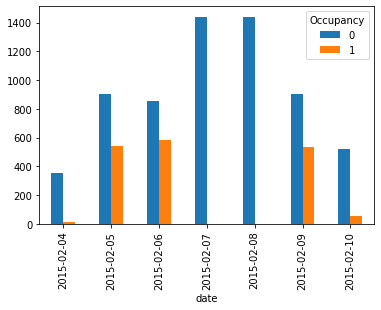

In [23]:
new_df.groupby(['date','Occupancy']).size().unstack().plot(kind='bar')

<AxesSubplot:xlabel='date'>

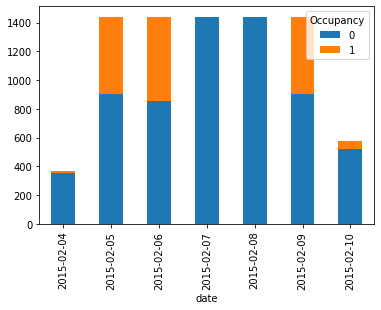

In [24]:
new_df.groupby(['date','Occupancy']).size().unstack().plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='date'>

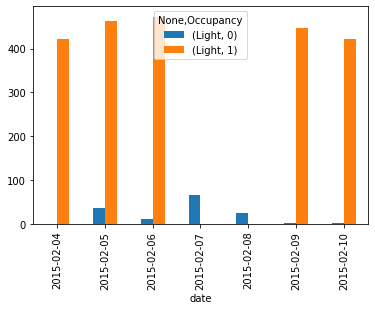

In [25]:
new_df.groupby(['date','Occupancy']).agg({'Light':'mean'}).unstack().plot(kind='bar')

## Lidando com dados faltantes

Nem todas as bases de dados estão completamente preenchidas, e precisamos saber como lidamos com essas inconsistências. 

Geralmente precisamos avaliar dados incoerentes ou faltantes. E como avaliamos isso? 

Usamos geralmente funções e análises que já vimos anteriormente...

In [8]:
#Exemplo 1 - Vendo dados faltantes 
df.isna()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
8138,False,False,False,False,False,False,False
8139,False,False,False,False,False,False,False
8140,False,False,False,False,False,False,False
8141,False,False,False,False,False,False,False


In [11]:
#Exemplo 2 - E se quisermos ver dados inconsistentes? 
#Podemos usar o describe, ver valores únicos, etc.
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


In [ ]:
#Para os valores faltantes que queremos preencher, usaremos o fillna.

In [ ]:
#Enquanto que, para os dados inconsistentes, usaremos o replace.
#Ou podemos usar alguma forma que já vimos...

## Exercícios

1. Considere a base de dados sobre o desempenho de estudantes em uma prova. Essa base de dados contém dados socio-econômicos e as notas em três disciplinas (Redação, Literatura e Matemática). Faça uma análise de dados para extrair informações que possam ser relevantes ao problema. 

Tente montar os resultados para, no mínimo, os seguintes questionamentos:

- Quantidade de alunos em função do grau de escolaridade dos pais.

- Notas de Matemática dos alunos em função do grau de escolaridade dos pais. 

- Relação entre a nota de Literatura e Redação.

- Relação entre a nota de Redação e Matemática. 

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/mdrs-thiago/uerj-topicos-a/main/datasets/StudentsPerformance.csv')

In [ ]:
df

2. Considere agora a base de dados **Netflix**, que contém informações de todo o catálogo da rede de streaming. Esta base de dados contém dados que podem ser importantes para os diferentes títulos adicionados. Explore a base de dados e extraia informações que podem ser úteis para esse tipo de problema. Lembre-se que este problema é de escopo aberto, então busque informações e relações que podem ser importantes. 

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/mdrs-thiago/uerj-topicos-a/main/datasets/netflix_titles.csv')

In [ ]:
df